In [6]:
import ROOT as r
import math
import array
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
from math import pi
import pandas as pd
from scipy.optimize import curve_fit


#______________Add include directory_______________
current_dir = os.getcwd()
include_dir = os.path.join(current_dir, '../include')
sys.path.insert(0, include_dir)
#__________________________________________________
import ERROR
import CONFIG
import DBPARSE
from PXPY import *
from ASYMMETRY import *
from UTILITIES import *
from SIMFITS import DistributionFits
from ROOT import gStyle, TChain, TH1F, TCanvas, TLegend
import CORRECTIONS
import CALCULATE
import GETFF
from joblib import Parallel, delayed
import importlib
#importlib.reload(ASYMMETRY)

Welcome to JupyROOT 6.26/06


In [7]:
wL,wR,vscint,tmeanoffset=DBPARSE.parse_hodotdc_file("DB/timing/hododb.txt")

In [8]:
tmeanoffset

array([ 2.0926    ,  2.21739   ,  2.39908   ,  1.74378   ,  2.38962   ,
        1.1122    ,  1.17838   ,  0.68532   , -0.441944  ,  1.39366   ,
        0.215405  ,  0.823796  ,  0.616725  , -0.0868784 ,  0.209355  ,
        0.466797  ,  0.357984  ,  1.08044   ,  0.80869   , -0.39865   ,
       -0.207042  ,  0.0642552 ,  0.276002  ,  0.66118   ,  0.77137   ,
        0.795584  ,  1.28952   ,  1.25215   ,  1.12782   ,  1.47181   ,
        5.28453   ,  1.19996   , -0.17287   , -1.06431   , -0.570802  ,
       -1.49939   , -0.709017  , -1.06921   , -0.088849  , -0.103843  ,
        0.10037   , -0.169916  , -1.06839   ,  0.191016  ,  0.219566  ,
       -0.257358  , -0.15387   ,  0.533168  ,  0.0144567 , -0.397961  ,
       -0.692803  , -1.11021   , -1.41229   , -0.802776  ,  0.00930221,
       -0.674047  , -0.488252  , -1.10877   , -1.32628   , -1.37975   ,
       -0.77328   ,  0.0977251 , -0.0681241 ,  1.22426   ,  0.630079  ,
        0.585764  ,  1.28487   ,  0.591047  ,  1.01298   ,  1.63

In [9]:
import numpy as np

def parse_flat_dat_file(filepath):
    # Load all numerical values from the file
    data = []
    with open(filepath, 'r') as f:
        for line in f:
            line = line.strip()
            if line:  # skip empty lines
                data.append(float(line))

    if len(data) < 360:
        raise ValueError("File does not contain at least 360 values")

    w0map = np.array(data[:180])
    wL = w0map[:90]
    wR = w0map[90:180]
    vscint = np.array(data[180:270])
    tmean = np.array(data[270:360])

    return wL, wR, vscint, tmean


In [10]:
garywL,garywR,garyvscint,garytmean=parse_flat_dat_file("DB/timing/testgar.txt")

In [11]:
garywL-wL

array([ 3.245476  ,  3.817756  ,  4.960007  ,  4.153459  ,  5.417065  ,
        6.648987  ,  6.966994  ,  5.342591  ,  4.695072  ,  4.357128  ,
        3.684721  ,  4.308691  ,  5.625579  ,  4.524625  ,  3.96566   ,
        3.407435  ,  3.70494   ,  3.762776  ,  2.754397  ,  5.475436  ,
        5.792941  ,  3.459375  ,  3.506312  ,  3.912076  ,  4.67567   ,
        4.994784  ,  5.559863  ,  5.166462  ,  4.25918   ,  5.832684  ,
        4.478691  ,  5.98306   ,  5.91522   ,  7.083066  ,  5.934792  ,
        4.345657  ,  5.394957  ,  5.900603  ,  6.273275  ,  8.252207  ,
        6.350285  ,  5.76137   ,  5.508479  ,  6.562213  ,  5.857332  ,
        6.200724  ,  7.098547  ,  7.498555  ,  7.650677  ,  6.549729  ,
        7.603401  ,  5.838858  ,  4.365164  ,  6.901078  ,  7.405365  ,
        6.70354   ,  7.330563  ,  5.439794  ,  5.283895  ,  6.700199  ,
        7.80866   ,  7.084243  ,  7.479489  ,  8.066714  ,  6.922873  ,
        6.199535  ,  7.4536    ,  6.885864  ,  4.145779  ,  3.58

In [12]:
garywR-wR

array([6.080932, 5.766025, 5.8594  , 5.403161, 5.615134, 5.325873,
       5.411462, 5.976851, 6.291161, 6.598302, 6.741268, 6.453328,
       6.290924, 6.208636, 6.353555, 6.68641 , 6.271694, 6.22729 ,
       6.225164, 5.540134, 5.617349, 6.302335, 6.374654, 6.477983,
       6.287656, 6.057135, 5.913061, 5.959939, 6.020116, 6.020287,
       6.564313, 5.908846, 5.921144, 5.371725, 6.15142 , 6.888425,
       6.364283, 5.92945 , 5.977527, 5.631271, 6.126805, 6.219211,
       6.203947, 6.037851, 6.037927, 5.724922, 5.420869, 5.610438,
       6.028908, 6.0738  , 5.983184, 6.555372, 6.561059, 5.766495,
       5.662469, 5.690753, 5.711094, 6.108688, 6.239534, 6.005062,
       5.665103, 5.920989, 5.965972, 6.058395, 6.230779, 6.126128,
       5.950051, 5.851543, 6.411158, 6.553676, 5.899796, 6.003905,
       5.67766 , 5.757213, 6.156371, 6.410121, 6.679351, 5.822255,
       5.80599 , 6.840313, 5.934256, 5.271356, 5.922999, 6.32372 ,
       6.288148, 6.310843, 7.296273, 0.236973, 0.236973, 0.236

In [13]:
garyvscint

array([-3.07771e-01, -3.19548e-01, -3.43288e-01, -3.30521e-01,
       -3.15134e-01, -4.00682e-01, -3.85118e-01, -2.40789e-01,
       -2.62394e-01, -2.12939e-01, -2.60152e-01, -3.12837e-01,
       -3.56972e-01, -3.42708e-01, -2.79162e-01, -2.61293e-01,
       -2.88405e-01, -3.06132e-01, -2.64008e-01, -4.35329e-01,
       -4.25531e-01, -2.90137e-01, -2.50672e-01, -2.65075e-01,
       -3.27995e-01, -3.32180e-01, -3.45760e-01, -3.31127e-01,
       -2.82763e-01, -3.39194e-01, -2.95378e-01, -3.52185e-01,
       -3.80380e-01, -4.32986e-01, -3.02177e-01, -2.59845e-01,
       -2.69848e-01, -3.50770e-01, -3.21852e-01, -4.30186e-01,
       -2.86690e-01, -2.68984e-01, -3.18418e-01, -3.35280e-01,
       -2.94636e-01, -3.41700e-01, -3.91200e-01, -3.70434e-01,
       -3.55043e-01, -3.27395e-01, -3.65456e-01, -2.72464e-01,
       -2.39390e-01, -3.58129e-01, -3.61524e-01, -3.43751e-01,
       -3.57669e-01, -2.95070e-01, -2.88238e-01, -3.56581e-01,
       -3.85660e-01, -2.94227e-01, -3.02854e-01, -2.926

In [14]:
garyvscint-vscint

array([-0.426628 , -0.446936 , -0.463383 , -0.467229 , -0.462334 ,
       -0.529515 , -0.51537  , -0.358149 , -0.378092 , -0.34798  ,
       -0.391857 , -0.441521 , -0.485249 , -0.470273 , -0.415984 ,
       -0.398698 , -0.422336 , -0.435678 , -0.397759 , -0.553835 ,
       -0.548975 , -0.411854 , -0.372879 , -0.392533 , -0.442741 ,
       -0.45343  , -0.469024 , -0.447754 , -0.404521 , -0.462743 ,
       -0.415155 , -0.478407 , -0.510288 , -0.553174 , -0.422816 ,
       -0.373295 , -0.385611 , -0.466099 , -0.439489 , -0.54481  ,
       -0.411417 , -0.389504 , -0.434301 , -0.454028 , -0.419099 ,
       -0.463267 , -0.506    , -0.488816 , -0.472201 , -0.445568 ,
       -0.47676  , -0.391304 , -0.354859 , -0.471546 , -0.480952 ,
       -0.460423 , -0.472924 , -0.414438 , -0.409099 , -0.471139 ,
       -0.498153 , -0.414979 , -0.420397 , -0.417921 , -0.395166 ,
       -0.371308 , -0.459919 , -0.483849 , -0.371458 , -0.340463 ,
       -0.407254 , -0.473814 , -0.478705 , -0.498958 , -0.4259

In [15]:
import ROOT

In [16]:
Pass="2"
config="2"
useGrinch=False
base_dir = f"/media/research/TOSHIBA EXT/GEn/NumpyData/Pass{Pass}/GEN{config}/Timing"


In [17]:
W2min=CONFIG.Function_JSON("W2min",f"../config/Pass{Pass}/cuts{config}.cfg")
W2max=CONFIG.Function_JSON("W2max",f"../config/Pass{Pass}/cuts{config}.cfg")
dxmin=CONFIG.Function_JSON("dxmin",f"../config/Pass{Pass}/cuts{config}.cfg")
dxmax=CONFIG.Function_JSON("dxmax",f"../config/Pass{Pass}/cuts{config}.cfg")
dymin=CONFIG.Function_JSON("dymin",f"../config/Pass{Pass}/cuts{config}.cfg")
dymax=CONFIG.Function_JSON("dymax",f"../config/Pass{Pass}/cuts{config}.cfg")
dybgmin=CONFIG.Function_JSON("dybgmin",f"../config/Pass{Pass}/cuts{config}.cfg")
dybgmax=CONFIG.Function_JSON("dybgmax",f"../config/Pass{Pass}/cuts{config}.cfg")
coinmin=CONFIG.Function_JSON("coinmin",f"../config/Pass{Pass}/cuts{config}.cfg")
coinmax=CONFIG.Function_JSON("coinmax",f"../config/Pass{Pass}/cuts{config}.cfg")
Q2=CONFIG.Function_JSON("Q2",f"../config/Pass{Pass}/cuts{config}.cfg")

#  "dxmin"	: -0.481,
#  "dxmax"	: 0.498, old gen2


print(f'W2min: {W2min}')
print(f'W2max: {W2max}')
print(f'dxmin: {dxmin}')
print(f'dxmax: {dxmax}')
print(f'dymin: {dymin}')
print(f'dymax: {dymax}')
print(f'dybgmin: {dybgmin}')
print(f'dybgmax: {dybgmax}')
print(f'Q2: {Q2}')
print(f'Coin Min: {coinmin} Coin Max: {coinmax}')



W2min: 0
W2max: 1.5
dxmin: -0.8
dxmax: 0.8
dymin: -0.822
dymax: 0.8
dybgmin: -1.4
dybgmax: 1.4
Q2: 3
Coin Min: 128 Coin Max: 139


In [18]:
etof0 = (1.96+3.0)/0.299792458
c = 0.299792458
zhodo = 1.854454
Lbar_hodo = 0.6
vscint_default = 0.16 
wL_default = 0.3
wR_default = 0.21
vscint = np.full(90, vscint_default)
wL = np.full(90, wL_default)
wR = np.full(90, wR_default)
Lbar_hodo = 0.6

In [19]:
hodomeantime_gen2 = np.load("DB/timing/hodomeantime_offsets_gen2.npy").astype(float)


In [20]:
generic=np.load(f"{base_dir}/timing0.npz")


In [21]:
len(generic["meantime"])

2000000

In [22]:
"""i=0
all_bars=[]
all_times=[]
while os.path.exists(f"{base_dir}/timing{i}.npz"):
    # load your i-th chunk here
    print(i)
    data = np.load(f"{base_dir}/timing{i}.npz")  # or .npy/.h5 depending on your format


    HODOraw = data["HODOtmean"]
    bb_rftime = data["bb_rftime"]
    primarybarid = np.transpose(data["barid"])[0]

    dtRF = HODOraw - bb_rftime


    all_bars.append(primarybarid)
    all_times.append(dtRF)
    i+=1
all_bars = np.concatenate(all_bars)
all_times = np.concatenate(all_times)"""


'i=0\nall_bars=[]\nall_times=[]\nwhile os.path.exists(f"{base_dir}/timing{i}.npz"):\n    # load your i-th chunk here\n    print(i)\n    data = np.load(f"{base_dir}/timing{i}.npz")  # or .npy/.h5 depending on your format\n\n\n    HODOraw = data["HODOtmean"]\n    bb_rftime = data["bb_rftime"]\n    primarybarid = np.transpose(data["barid"])[0]\n\n    dtRF = HODOraw - bb_rftime\n\n\n    all_bars.append(primarybarid)\n    all_times.append(dtRF)\n    i+=1\nall_bars = np.concatenate(all_bars)\nall_times = np.concatenate(all_times)'

In [23]:
"""plt.figure(figsize=(10, 6))
h = plt.hist2d(bars, times, bins=[n_bars, bins_y], range=[[0, n_bars], list(y_range)], cmap='viridis')
plt.colorbar(h[3], label='Counts')
plt.xlabel("Primary Hodoscope Bar ID")
plt.ylabel(r"$t_\mathrm{raw} - t_\mathrm{RF}$ (ns)")
plt.title("Timing Residual vs Bar ID")
plt.tight_layout()
plt.show()"""


'plt.figure(figsize=(10, 6))\nh = plt.hist2d(bars, times, bins=[n_bars, bins_y], range=[[0, n_bars], list(y_range)], cmap=\'viridis\')\nplt.colorbar(h[3], label=\'Counts\')\nplt.xlabel("Primary Hodoscope Bar ID")\nplt.ylabel(r"$t_\\mathrm{raw} - t_\\mathrm{RF}$ (ns)")\nplt.title("Timing Residual vs Bar ID")\nplt.tight_layout()\nplt.show()'

In [24]:
genericMaster = {}

def doit():
    base_dir = f"/media/research/TOSHIBA EXT/GEn/NumpyData/Pass{Pass}/GEN{config}/Timing"
    i = 0
    print(f"NumPy array directory = {base_dir}")
    while os.path.exists(f"{base_dir}/timing{i}.npz"):
        #if i >5:
        #    break
        print(f"Loading in file {i}")
        file_path = f"{base_dir}/timing{i}.npz"
        data = np.load(file_path)

        for key in data.files:
            if key not in genericMaster:
                genericMaster[key] = data[key]
            else:
                genericMaster[key] = np.concatenate((genericMaster[key], data[key]))

        data.close()
        i += 1

    print(f"Loaded {i} files into genericMaster.")


In [25]:
%load_ext memory_profiler
#%memit doit()


In [26]:
#runnum=generic["runnum"]
tleft=generic["tleft"]
tright=generic["tright"]
totleft=generic["totleft"]
totright=generic["totright"]
vpos=generic["vpos"]
barid=generic["barid"]
nbars=generic["nbars"]
bb_rftime=generic["bb_rftime"]
sbs_rftime=generic["sbs_rftime"]
hodo_rftime=generic["hodo_rftime"]
hcal_rftime=generic["hcal_rftime"]
HODOmeantime=generic["meantime"]
eblk=generic["cblke"]
idblk=generic["cblkid"]
timeblk=generic["cblktime"]
vz=generic["vz"]
pathl=generic["pathl"]
barid = np.where(barid == 0, -1, barid)  # Mask out bar 0 entirely
tr_x=generic["tr_x"]
tr_y=generic["tr_y"]
tr_th=generic["tr_th"]
tr_ph=generic["tr_ph"]
HCALtw=generic["HCALtw"]
dx=generic["dx"]
dy=generic["dy"]
w2=generic["W2"]
cut=(dxmin<dx)&(dxmax>dx)&(dymin<dy)&(dymax>dy)&(W2min<w2)&(W2max>w2)

In [28]:
np.unique(bb_rftime)

array([-156.48544, -138.20224, -123.7632 , ...,  141.48384,  150.76608,
        151.51616])

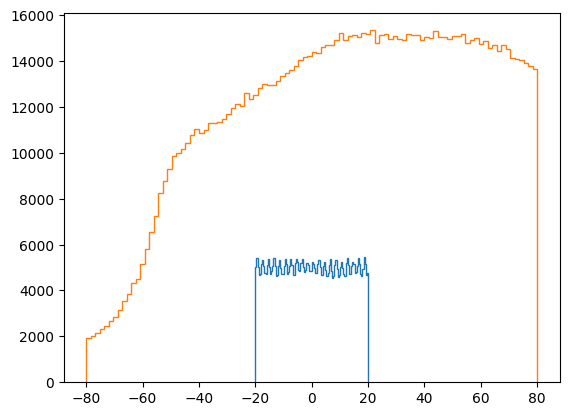

In [74]:
d=plt.hist(np.transpose(HODOmeantime)[0]-bb_rftime,bins=100,range=(-20,20),histtype='step')
d=plt.hist(np.transpose(timeblk)[0]-hcal_rftime,bins=100,range=(-80,80),histtype='step')

In [75]:
len(totleft[0])

5

In [76]:
runs_filtered = generic["runnum"][cut]

# Now apply the run number cut:
valid_runs = runs_filtered > 2165
runs_filtered = runs_filtered[valid_runs]
unique_runnum, run_idx = np.unique(runs_filtered, return_inverse=True)


# Run Number Dependance

In [29]:
runnum=[]
tleft=[]
tright=[]
totleft=[]
totright=[]
vpos=[]
barid=[]
nbars=[]
nblk=[]
bb_rftime=[]
sbs_rftime=[]
hodo_rftime=[]
hcal_rftime=[]
HODOmeantime=[]
eblk=[]
idblk=[]
timeblk=[]
vz=[]
pathl=[]
tr_x=[]
tr_y=[]
tr_th=[]
tr_ph=[]
HCALtw=[]

def Cut():
    base_dir = f"/media/research/TOSHIBA EXT/GEn/NumpyData/Pass{Pass}/GEN{config}/Timing"
    i = 0
    print(f"NumPy array directory = {base_dir}")
    while os.path.exists(f"{base_dir}/timing{i}.npz"):
        
        
        if i>3: break
            
        print(f"Loading in file {i}")
        file_path = f"{base_dir}/timing{i}.npz"
        data = np.load(file_path)
        
        dx=data["dx"]
        dy=data["dy"]
        w2=data["W2"]
        cut=(dxmin<dx)&(dxmax>dx)&(dymin<dy)&(dymax>dy)&(W2min<w2)&(W2max>w2)
        cut=(0<w2)&(2>w2)
        
        runnum.extend(data["runnum"][cut])
            
        timeblk.extend(data["cblktime"][cut])
        HODOmeantime.extend(data["meantime"][cut])
        tleft.extend(data["tleft"][cut])
        tright.extend(data["tright"][cut])
        totleft.extend(data["totleft"][cut])
        totright.extend(data["totright"][cut])
        vpos.extend(data["vpos"][cut])
        barid.extend(data["barid"][cut])
        nbars.extend(data["nbars"][cut])
        nblk.extend(data["nblk"][cut])
        bb_rftime.extend(data["bb_rftime"][cut])
        sbs_rftime.extend(data["sbs_rftime"][cut])
        hodo_rftime.extend(data["hodo_rftime"][cut])
        hcal_rftime.extend(data["hcal_rftime"][cut])
        eblk.extend(data["cblke"][cut])
        idblk.extend(data["cblkid"][cut])
        vz.extend(data["vz"][cut])
        pathl.extend(data["pathl"][cut])
        tr_x.extend(data["tr_x"][cut])
        tr_y.extend(data["tr_y"][cut])
        tr_th.extend(data["tr_th"][cut])
        tr_ph.extend(data["tr_ph"][cut])
        HCALtw.extend(data["HCALtw"][cut])
        
        i+=1

    print(f"Loaded {i} files into genericMaster.")
Cut()


runnum=np.array(runnum)
nbars=np.array(nbars)

tleft=np.transpose(tleft)
tright=np.transpose(tright)
totleft=np.transpose(totleft)
totright=np.transpose(totright)
vpos=np.transpose(vpos)
barid=np.transpose(barid)
HODOmeantime=np.transpose(HODOmeantime)
eblk=np.transpose(eblk)
idblk=np.transpose(idblk)
timeblk=np.transpose(timeblk)

bb_rftime=np.array(bb_rftime)
sbs_rftime=np.array(sbs_rftime)
hodo_rftime=np.array(hodo_rftime)
hcal_rftime=np.array(hcal_rftime)
vz=np.array(vz)
pathl=np.array(pathl)
tr_x=np.array(tr_x)
tr_y=np.array(tr_y)
tr_th=np.array(tr_th)
tr_ph=np.array(tr_ph)
HCALtw=np.array(HCALtw)

NumPy array directory = /media/research/TOSHIBA EXT/GEn/NumpyData/Pass2/GEN2/Timing
Loading in file 0
Loading in file 1
Loading in file 2
Loading in file 3
Loaded 4 files into genericMaster.


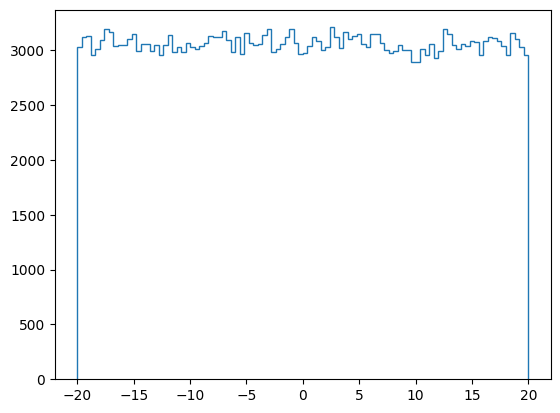

In [30]:
#d=plt.hist(HODOmeantime[0]-hodo_rftime,bins=100,range=(-10,10),histtype='step')
d=plt.hist(HODOmeantime[0]-bb_rftime,bins=100,range=(-20,20),histtype='step')

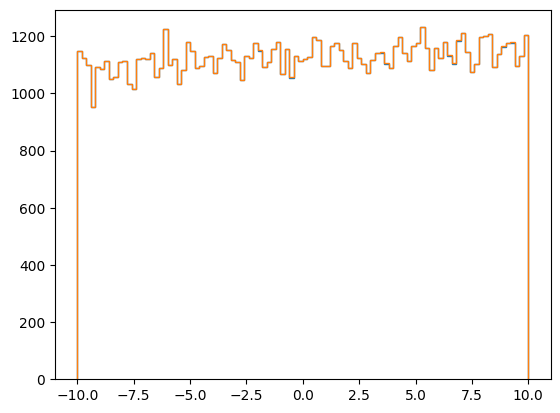

In [31]:
d=plt.hist(timeblk[0]-hcal_rftime,bins=100,range=(-10,10),histtype='step')
d=plt.hist(timeblk[0]-sbs_rftime,bins=100,range=(-10,10),histtype='step')

In [32]:
def ApplyHodoCorrection(nbars,barid,tleft,tright,totleft,totright,pathl,vz,tr_y,tr_x,tr_ph,tr_th,
                       wL,wR,vscint,tmeanoffset):   
    tmeanperevent=[]
    for i in range(0,len(nbars)):
        etof=pathl[i]/.299792458-etof0
        yhodo = tr_y[i] + zhodo * tr_ph[i] 
        xhodo = tr_x[i] + zhodo * tr_th[i]
        dLEFT = np.clip(Lbar_hodo / 2 - yhodo, 0, Lbar_hodo)
        dRIGHT = np.clip(Lbar_hodo / 2 + yhodo, 0, Lbar_hodo)
        tmeanperbar=[]
        for j in range(0,nbars[i]):
            b=int(barid[j][i])
            tleft_corr = tleft[j][i] - etof - wL[b] * totleft[j][i] - dLEFT / vscint[b]
            tright_corr = tright[j][i] - etof - wR[b] * totright[j][i] - dRIGHT / vscint[b]
            tmeanperbar.append((tleft_corr+tright_corr)/2)
        tmeanperevent.append(tmeanperbar)
    return tmeanperevent

testmean=ApplyHodoCorrection(nbars,barid,tleft,tright,totleft,totright,pathl,vz,tr_y,tr_x,tr_ph,tr_th,
                            wL,wR,vscint,tmeanoffset)

In [33]:
primarymean=[]
nobars=0
for i in range(0,len(testmean)):
    if nbars[i]>0:
        primarymean.append(testmean[i][0])
    else:
        nobars+=1

In [34]:
len(primarymean)/len(HODOmeantime[0])

0.7942828746577945

In [35]:
nobars/len(testmean)

0.20571712534220557

In [36]:
#d=plt.hist(primarymean,bins=100,alpha=.5)
#d=plt.hist(HODOmeantime[0],bins=100,alpha=.5)

In [ ]:
cut=(abs(timeblk[0])<30)&(abs(HODOmeantime[0])<30)
unique_runnum, run_idx = np.unique(runnum[cut], return_inverse=True)

rawcoin=(timeblk[0]-rawHODO[0])
coin=(timeblk[0]-HODOmeantime[0])
coin=(HCALtw-HODOmeantime[0])

plt.figure(figsize=(12, 6))
plt.hist2d(run_idx, coin[cut], bins=[len(unique_runnum), 20],range=((0,len(unique_runnum)),(-10,10)), cmap='viridis')
plt.colorbar(label="Counts")
plt.xlabel("Run Number")
plt.ylabel("Coincidence Time")
plt.title("sbs.hcal.clus_blk.tdctime[0]-bb.hodotdc.clus.bar.tdc.meantime[0]")
step = 10
tick_indices = np.arange(0, len(unique_runnum), step)
tick_labels = unique_runnum[tick_indices]

plt.xticks(ticks=tick_indices, labels=tick_labels, rotation=45)
plt.tight_layout()
plt.show()

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Gaussian function
def gaus(x, A, mu, sigma):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2))

# Main function
def plot_gaus(data, bins=100, full_range=(-20, 20), fit_range=(-10, 10)):
    lower, upper = fit_range

    # Full histogram
    counts, edges = np.histogram(data, bins=bins, range=full_range)
    centers = (edges[:-1] + edges[1:]) / 2

    # Mask for the fit range
    fit_mask = (centers >= lower) & (centers <= upper)
    x_fit = centers[fit_mask]
    y_fit = counts[fit_mask]

    # Initial guess: [amplitude, mean, sigma]
    p0 = [np.max(y_fit), x_fit[np.argmax(y_fit)], 5]

    # Gaussian fit
    popt, _ = curve_fit(gaus, x_fit, y_fit, p0=p0)

    # Plotting
    plt.figure(figsize=(8, 5))
    plt.hist(data, bins=bins, range=full_range, alpha=0.5, label='Data', color='skyblue')
    xplot = np.linspace(fit_range[0], fit_range[1], 1000)
    plt.plot(xplot, gaus(xplot, *popt), 'r--',label=f'Fit: μ={popt[1]:.2f}, σ={popt[2]:.2f}')
    plt.axvline(lower, color='gray', linestyle='dotted', alpha=0.7)
    plt.axvline(upper, color='gray', linestyle='dotted', alpha=0.7)
    plt.xlabel("Coincidence Time")
    plt.ylabel("Counts")
    plt.legend()
    #plt.grid(True)
    #plt.tight_layout()

    return popt  # Returns [A, mu, sigma]


In [2]:
plot_gaus(coin[nbars>0],fit_range=(-10,0))
plt.title("Hcal-hodo")
plot_gaus(rawcoin-10,fit_range=(-10,10))



NameError: name 'coin' is not defined

Text(0.5, 1.0, 'RF Structure')

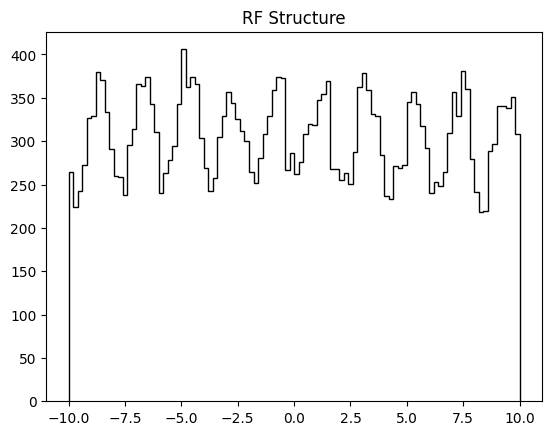

In [233]:
d=plt.hist(HODOmeantime[0]-bb_rftime,histtype='step',bins=100,range=(-10,10),color='black')
plt.title("RF Structure")

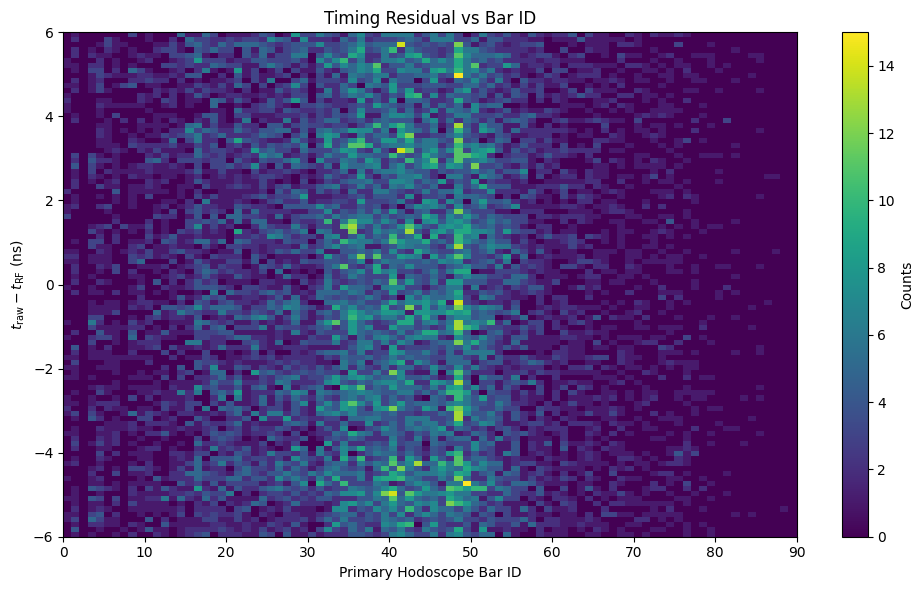

In [286]:
n_bars=90
bins_y=100
y_range=(-6, 6)
dtRF = HODOmeantime[0] - bb_rftime

# Ensure valid data
primarybarid = primarybarid.astype(int)
valid = (
    (primarybarid >= 0) & (primarybarid < n_bars) &
    np.isfinite(dtRF) & (np.abs(dtRF) < abs(y_range[1]))
)

bars = primarybarid[valid]
times = dtRF[valid]

# Plot
plt.figure(figsize=(10, 6))
h = plt.hist2d(bars, times, bins=[n_bars, bins_y], range=[[0, n_bars], list(y_range)], cmap='viridis')
plt.colorbar(h[3], label='Counts')
plt.xlabel("Primary Hodoscope Bar ID")
plt.ylabel(r"$t_\mathrm{raw} - t_\mathrm{RF}$ (ns)")
plt.title("Timing Residual vs Bar ID")
plt.tight_layout()
#plt.plot(HODOmeantime)
plt.show()


In [396]:
len(barid)

5

# Meantime Offsets - Loop 1

In [411]:
import numpy as np
import sys

def Loop1_partial(
    tleft, tright, totleft, totright, barid, vpos, nbars,
    vz, pathl, xtrack, ytrack, thtrack, phtrack,
    wL, wR, vscint, etof0, zhodo, Lbar_hodo, MeanTimeOffsets,
    ref_bar=44, n_bars_total=90,histograms=None
):
    c = 0.299792458  # Speed of light in ns/cm

    Minternal = np.zeros((n_bars_total, n_bars_total))
    binternal = np.zeros(n_bars_total)
    nevent_vs_bar = np.zeros(n_bars_total)

    n_events = len(nbars)
    for i in range(n_events):
        if i % 10000 == 0:
            sys.stdout.write(f"Loop 1: nevent = {i}, {i / n_events * 100:.2f}% complete\r")
            sys.stdout.flush()

        n = nbars[i]
        if n < 2:
            continue

        yhodo = ytrack[i] + zhodo * phtrack[i]
        xhodo = xtrack[i] + zhodo * thtrack[i]
        etof = pathl[i] / c - etof0
        tmean0 = None

        for ibar in range(n):
            IDHODO = int(barid[ibar, i])
            if IDHODO < 0 or IDHODO >= n_bars_total:
                continue

            tleft_i = tleft[ibar, i]
            tright_i = tright[ibar, i]
            totleft_i = totleft[ibar, i]
            totright_i = totright[ibar, i]
            xpos_i = vpos[ibar, i]
            vsc_i = vscint[IDHODO]

            dLEFT = np.clip(Lbar_hodo / 2 - yhodo, 0, Lbar_hodo)
            dRIGHT = np.clip(Lbar_hodo / 2 + yhodo, 0, Lbar_hodo)

            tleft_corr_i = tleft_i - etof - MeanTimeOffsets[IDHODO] + wL[IDHODO] * totleft_i - dLEFT / vsc_i
            tright_corr_i = tright_i - etof - MeanTimeOffsets[IDHODO] + wR[IDHODO] * totright_i - dRIGHT / vsc_i
            tmeancorr_i = 0.5 * (tleft_corr_i + tright_corr_i)
            tdiffcorr_i = tleft_corr_i - tright_corr_i
            ypos_i = -0.5 * vsc_i * tdiffcorr_i

            if ibar == 0:
                tmean0 = tmeancorr_i

            goodhit_i = (
                6 <= totleft_i <= 35 and
                6 <= totright_i <= 35 and
                abs(totleft_i - totright_i) <= 10 and
                abs(ypos_i - yhodo) <= 0.15 and
                abs(xpos_i - xhodo) <= 0.06 and
                abs(tmeancorr_i - tmean0) <= 10
            )

            if not goodhit_i:
                continue

            for jbar in range(ibar + 1, n):
                IDHODO_j = int(barid[jbar, i])
                if IDHODO_j < 0 or IDHODO_j >= n_bars_total:
                    continue

                tleft_j = tleft[jbar, i]
                tright_j = tright[jbar, i]
                totleft_j = totleft[jbar, i]
                totright_j = totright[jbar, i]
                xpos_j = vpos[jbar, i]
                vsc_j = vscint[IDHODO_j]

                tleft_corr_j = tleft_j - etof - MeanTimeOffsets[IDHODO_j] + wL[IDHODO_j] * totleft_j - dLEFT / vsc_j
                tright_corr_j = tright_j - etof - MeanTimeOffsets[IDHODO_j] + wR[IDHODO_j] * totright_j - dRIGHT / vsc_j
                tmeancorr_j = 0.5 * (tleft_corr_j + tright_corr_j)
                tdiffcorr_j = tleft_corr_j - tright_corr_j
                ypos_j = -0.5 * vsc_j * tdiffcorr_j

                goodhit_j = (
                    6 <= totleft_j <= 35 and
                    6 <= totright_j <= 35 and
                    abs(totleft_j - totright_j) <= 10 and
                    abs(ypos_j - yhodo) <= 0.15 and
                    abs(xpos_j - xhodo) <= 0.06 and
                    abs(tmeancorr_j - tmean0) <= 10
                )

                if not goodhit_j:
                    continue

                t_i = tmeancorr_i
                t_j = tmeancorr_j
                if histograms is not None:
                    key = (min(IDHODO, IDHODO_j), max(IDHODO, IDHODO_j))
                    histograms[key].append(t_i - t_j)
                binternal[IDHODO] += t_i - t_j
                binternal[IDHODO_j] += t_j - t_i

                Minternal[IDHODO, IDHODO] += 1.0
                Minternal[IDHODO, IDHODO_j] += -1.0
                Minternal[IDHODO_j, IDHODO] += -1.0
                Minternal[IDHODO_j, IDHODO_j] += 1.0

                nevent_vs_bar[IDHODO] += 1
                nevent_vs_bar[IDHODO_j] += 1

    return Minternal, binternal, nevent_vs_bar


In [413]:
"""Loop1_partial(
    tleft, tright, totleft, totright, barid, vpos, nbars,
    vz, pathl, tr_x, tr_y, tr_th, tr_ph,
    wL, wR, vscint, etof0, zhodo, Lbar_hodo, tmeanoffset,
    ref_bar=44, n_bars_total=90
)"""

'Loop1_partial(\n    tleft, tright, totleft, totright, barid, vpos, nbars,\n    vz, pathl, tr_x, tr_y, tr_th, tr_ph,\n    wL, wR, vscint, etof0, zhodo, Lbar_hodo, tmeanoffset,\n    ref_bar=44, n_bars_total=90\n)'

In [414]:
from collections import defaultdict

pairwise_residuals = defaultdict(list)  # key: (bar_i, bar_j), value: list of Δt_ij


In [416]:
import numpy as np
import os

# Initialize total system
n_bars = 90
M_total = np.zeros((n_bars, n_bars))
b_total = np.zeros(n_bars)
nevents_total = np.zeros(n_bars)

base_dir = f"/media/research/TOSHIBA EXT/GEn/NumpyData/Pass{Pass}/GEN{config}/Timing"
i = 0

while os.path.exists(f"{base_dir}/timing{i}.npz"):
    print(f"Processing chunk {i}")
    data = np.load(f"{base_dir}/timing{i}.npz")
    cut=(data["W2"]<2)&(data["W2"]>0)
    MeanTimeOffsets = np.zeros(n_bars)  # Pass dummy initial offsets
    M, b, nev = Loop1_partial(np.transpose(data["tleft"][cut]), np.transpose(data["tright"][cut]), 
        np.transpose(data["totleft"][cut]), np.transpose(data["totright"][cut]), np.transpose(data["barid"][cut]),
        np.transpose(data["vpos"][cut]), data["nbars"][cut], data["vz"][cut], data["pathl"][cut],
        data["tr_x"][cut], data["tr_y"][cut], data["tr_th"][cut], data["tr_ph"][cut],
        wL, wR, vscint, etof0, zhodo, Lbar_hodo,
        MeanTimeOffsets,  # dummy offset (only affects internal corrections per chunk)
        ref_bar=44, n_bars_total=n_bars,histograms=pairwise_residuals
    )

    M_total += M
    b_total += b
    nevents_total += nev
    i += 1

# Post-pass regularization
for i in range(n_bars):
    if nevents_total[i] < 100:
        print(f"Bar {i} too low stats — regularizing")
        b_total[i] = 0.0
        M_total[i, :] = 0.0
        M_total[:, i] = 0.0
        M_total[i, i] = 1.0

# Solve system
binternal = np.linalg.solve(M_total, b_total)

# Apply correction to keep MeanTimeOffsets[ref_bar] fixed
corr = -(MeanTimeOffsets[ref_bar] + binternal[ref_bar])
offsets = binternal + corr

# Update MeanTimeOffsets in place
MeanTimeOffsets += offsets

# Print
for i in range(n_bars):
    print(f"(i, MeanTimeOffsets[i]) = ({i}, {MeanTimeOffsets[i]:.6f})")



Processing chunk 0
Processing chunk 100000, 98.67% complete
Processing chunk 200000, 96.50% complete
Processing chunk 300000, 95.57% complete
Processing chunk 400000, 95.32% complete
Processing chunk 500000, 95.60% complete
Processing chunk 600000, 93.75% complete
Processing chunk 700000, 92.58% complete
Processing chunk 800000, 92.75% complete
Processing chunk 900000, 93.37% complete
Processing chunk 100000, 94.96% complete
Processing chunk 110000, 94.91% complete
Processing chunk 120000, 94.11% complete
Processing chunk 130000, 93.10% complete
Processing chunk 140000, 92.49% complete
Processing chunk 150000, 92.08% complete
Processing chunk 160000, 93.41% complete
Processing chunk 170000, 95.06% complete
Processing chunk 180000, 95.66% complete
Processing chunk 190000, 95.48% complete
Processing chunk 20000, 93.62% complete
Processing chunk 21000, 92.50% complete
Processing chunk 22000, 92.52% complete
Processing chunk 23000, 94.27% complete
Processing chunk 24000, 90.48% complete
Pr

In [430]:
MeanTimeOffsets = np.zeros(n_bars)  # Now it's meaningful
ref_bar=44
# Solve the system
binternal = np.linalg.solve(M_total, b_total)

# C++: double corr = -(MeanTimeOffsets[ref_bar] + binternal(ref_bar));
corr = -(MeanTimeOffsets[ref_bar] + binternal[ref_bar])

# C++ loop: binternal[i] += corr; MeanTimeOffsets[i] += binternal[i];
for i in range(n_bars):
    binternal[i] += corr
    MeanTimeOffsets[i] += binternal[i]



In [431]:
MeanTimeOffsets

array([11.91715339, 10.79022871,  8.99283912, 13.92129871, 13.65414663,
       12.60174255, 10.67245185, 12.20220694, 11.0824925 , 11.81692458,
       10.20013208, 10.90265187, 10.44576555,  9.21170179,  9.48369724,
        8.29046725,  8.05282008,  9.20949263,  7.01474725,  6.31650061,
        6.99946882,  5.37110626,  6.08237473,  6.35710299,  5.94242296,
        5.83546126,  5.99539823,  5.49646568,  4.28466514,  5.17923871,
        1.80905235,  4.39114762,  2.88329465,  1.07500784,  1.26120077,
       -0.27547363,  0.44447895,  0.01938436,  0.07957769,  0.76439105,
       -0.45218899, -0.17437868, -0.27344875,  0.48641498,  0.        ,
       -0.7347795 , -0.10217063,  0.4489703 , -0.97046813, -1.21490398,
       -1.14480509, -1.93792381, -2.05758773, -1.67766843, -1.69721648,
       -2.63053883, -1.89116759, -2.4041712 , -3.43489977, -2.1872848 ,
       -2.83771902, -2.506231  , -1.38887036, -0.0389062 , -1.10049342,
       -0.52373766, -0.44827563, -0.92069863, -0.81162457,  0.01

In [432]:
import matplotlib.pyplot as plt
os.makedirs("pairwise_raw", exist_ok=True)

for (i, j), vals in pairwise_residuals.items():
    if len(vals) < 100:
        continue
    plt.figure()
    plt.hist(vals, bins=100, range=(-5, 5), alpha=0.75)
    plt.title(f"Raw Δtmean: bar {i} - bar {j}")
    plt.xlabel("Δt (ns)")
    plt.ylabel("Counts")
    plt.tight_layout()
    plt.savefig(f"pairwise_raw/dtmean_bar{i}_bar{j}.png")
    plt.close()


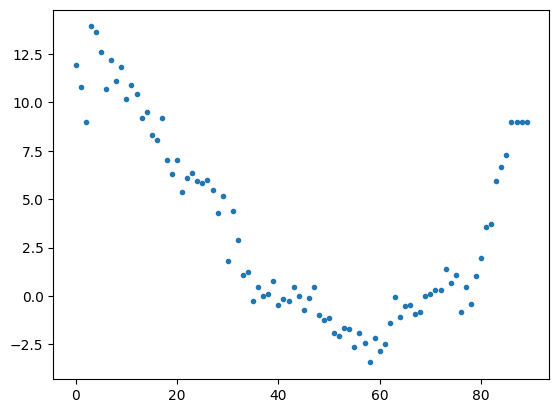

In [428]:
plt.plot(MeanTimeOffsets,'.')

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Flatten and filter valid barids (0 to 89)
valid_barids = barid

# Count occurrences
unique_bars, counts = np.unique(valid_barids, return_counts=True)

# Plot histogram
plt.figure(figsize=(10, 5))
plt.bar(unique_bars, nev, width=0.8)
plt.xlabel("Bar ID")
plt.ylabel("Occurrences")
plt.title("Bar ID Usage Across All Events")
plt.xticks(np.arange(0, 90, 5))
plt.grid(True)
plt.show()


NameError: name 'barid' is not defined

# Walk Corrections

In [456]:
import numpy as np

def solve_walk_and_prop_corrections(
    tleft, tright, totleft, totright, vpos, barid, nbars,
    vz, pathl, xtrack, ytrack, thtrack, phtrack,
    MeanTimeOffsets,
    etof0=30.0, zhodo=1.8, Lbar_hodo=0.9,
    n_bars=90, min_events_per_bar=50
):
    c = 0.299792458
    nparams = 3 * n_bars  # t0, wL, wR per bar
    Mhodo = np.zeros((nparams, nparams))
    bhodo = np.zeros(nparams)
    event_counts = np.zeros(n_bars)

    for i in range(len(nbars)):
        n = nbars[i]
        if n < 1:
            continue

        yhodo = ytrack[i] + zhodo * phtrack[i]
        xhodo = xtrack[i] + zhodo * thtrack[i]
        etof = pathl[i] / c - etof0

        for j in range(n):
            b = int(barid[j, i])
            if b < 0 or b >= n_bars:
                continue

            # Hit-level quantities
            tL = tleft[j, i]
            tR = tright[j, i]
            TOTL = totleft[j, i]
            TOTR = totright[j, i]
            xpos = vpos[j, i]

            # Geometry
            dLEFT = np.clip(Lbar_hodo / 2 - yhodo, 0, Lbar_hodo)
            dRIGHT = np.clip(Lbar_hodo / 2 + yhodo, 0, Lbar_hodo)

            # Raw times corrected only for etof and offset
            tL_corr = tL - etof - MeanTimeOffsets[b]
            tR_corr = tR - etof - MeanTimeOffsets[b]

            # Meantime + asymmetry
            tmean = 0.5 * (tL_corr + tR_corr)
            tdiff = tL_corr - tR_corr
            ypos = -0.5 * dLEFT * tdiff

            # Hit quality cuts
            if not (
                6 <= TOTL <= 35 and
                6 <= TOTR <= 35 and
                abs(TOTL - TOTR) <= 10 and
                abs(ypos - yhodo) <= 0.15 and
                abs(xpos - xhodo) <= 0.06
            ):
                continue

            event_counts[b] += 1

            # Matrix indices
            i_t0 = b
            i_wL = b + n_bars
            i_wR = b + 2 * n_bars

            # Left PMT
            Mhodo[i_t0, i_t0] += 1
            Mhodo[i_t0, i_wL] += -TOTL
            Mhodo[i_wL, i_t0] += -TOTL
            Mhodo[i_wL, i_wL] += TOTL**2
            bhodo[i_t0] += tL_corr
            bhodo[i_wL] += -tL_corr * TOTL

            # Right PMT
            Mhodo[i_t0, i_t0] += 1
            Mhodo[i_t0, i_wR] += -TOTR
            Mhodo[i_wR, i_t0] += -TOTR
            Mhodo[i_wR, i_wR] += TOTR**2
            bhodo[i_t0] += tR_corr
            bhodo[i_wR] += -tR_corr * TOTR

    # Regularize underpopulated bars
    for b in range(n_bars):
        if event_counts[b] < min_events_per_bar:
            for idx in [b, b + n_bars, b + 2 * n_bars]:
                Mhodo[idx, :] = 0
                Mhodo[:, idx] = 0
                Mhodo[idx, idx] = 1
                bhodo[idx] = 0.0

    # Solve
    params = np.linalg.lstsq(Mhodo, bhodo, rcond=None)[0]
    t0 = params[0:n_bars]
    wL = params[n_bars:2*n_bars]
    wR = params[2*n_bars:3*n_bars]
    vscint = np.full(n_bars, 0.13)  # placeholder for now

    return t0, wL, wR, vscint, event_counts


In [457]:
HODOt0, HODOwL, HODOwR, vscint_fixed, event_counts = solve_walk_and_prop_corrections(
    tleft, tright, totleft, totright, vpos, barid, nbars,
    vz, pathl, tr_x, tr_y, tr_th, tr_ph,
    offsets,
    etof0
)


In [461]:
def apply_final_hodo_corrections(
    tleft, tright, totleft, totright, vpos, barid, nbars,
    pathl, MeanTimeOffsets, wL, wR, vscint,
    etof0=30.0, c=0.299792458, Lbar_hodo=0.9, zhodo=1.8,
    xtrack=None, ytrack=None, thtrack=None, phtrack=None
):
    """
    Applies all final hodoscope corrections (walk, propagation, etof, t0 offset) to each hit
    and returns a per-event final corrected mean time using the primary bar (bar 0 in each event).
    """
    n_events = len(nbars)
    HODO_final = np.full(n_events, np.nan)

    for i in range(n_events):
        if nbars[i] < 1:
            continue

        b = int(barid[0][i])  # primary bar only
        if b < 0 or b >= len(wL):
            continue

        # Pull values
        tL = tleft[0][i]
        tR = tright[0][i]
        TOTL = totleft[0][i]
        TOTR = totright[0][i]
        vsc = vscint[b]

        # Optional: get geometry from track projection
        if xtrack is not None and ytrack is not None and thtrack is not None and phtrack is not None:
            yhodo = ytrack[i] + zhodo * phtrack[i]
            dLEFT = np.clip(Lbar_hodo / 2 - yhodo, 0, Lbar_hodo)
            dRIGHT = np.clip(Lbar_hodo / 2 + yhodo, 0, Lbar_hodo)
        else:
            # Fallback if no track info: symmetric prop distances
            dLEFT = dRIGHT = Lbar_hodo / 2

        etof = pathl[i] / c - etof0

        # Apply all corrections
        tL_corr = tL - etof + wL[b]*TOTL - MeanTimeOffsets[b] - dLEFT / vsc
        tR_corr = tR - etof + wR[b]*TOTR - MeanTimeOffsets[b] - dRIGHT / vsc
        HODO_final[i] = 0.5 * (tL_corr + tR_corr)

    return HODO_final


In [462]:
HODO_final = apply_final_hodo_corrections(
    tleft, tright, totleft, totright, vpos, barid, nbars,
    pathl, offsets, HODOwL, HODOwR, vscint_fixed,
    xtrack=tr_x, ytrack=tr_y, thtrack=tr_th, phtrack=tr_ph
)


In [467]:
len(HODO_final)-len(timeblk[0])

0

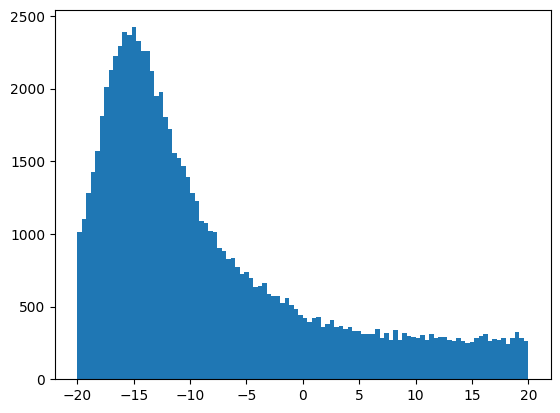

In [471]:
d=plt.hist(HCALtw-HODO_final,bins=100,range=(-20,20))

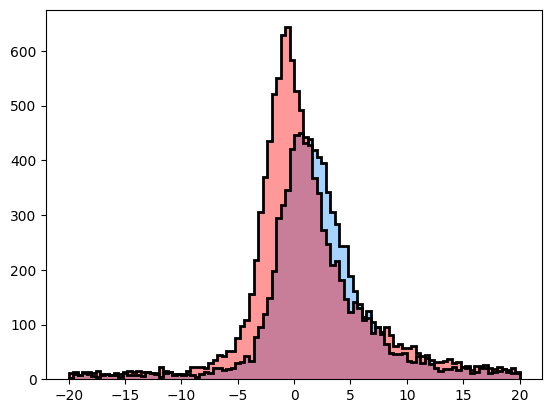

In [290]:
d=plt.hist(HCALtw[cut]-HODO_final[cut]+18,histtype='step',bins=100,linewidth=2,range=(-20,20),color='black')
d=plt.hist(HCALtw[cut]-HODO_final[cut]+18,bins=100,linewidth=.5,range=(-20,20),color='dodgerblue',alpha=.4)

d=plt.hist(tdctimeblk[cut]-HODOraw[cut],histtype='step',bins=100,linewidth=2,range=(-20,20),color='black')
d=plt.hist(tdctimeblk[cut]-HODOraw[cut],bins=100,linewidth=.5,range=(-20,20),color='red',alpha=.4)

# RF Offsets

In [258]:
def compute_rf_offsets_loop2(
    tleft, tright, totleft, totright, vpos, barid, nbars,
    vz, pathl, xtrack, ytrack, thtrack, phtrack,
    MeanTimeOffsets,
    bb_rftime,
    etof0, zhodo, Lbar_hodo,wL_default, wR_default, vscint_default,
    bunch_spacing=160.321,
    c=0.299792458,
    
):
    """
    Loop 2: Use default wL, wR, vscint and MeanTimeOffsets (from Loop 1)
    to calculate t_HODO - RF per bar and return for histogramming.
    """
    dtRF_list = []
    barid_list = []
    globalcut=(abs(bb_trigtime)<1e5)&(abs(bb_rftime<1e5))

    for i in range(len(nbars)):
        if not globalcut[i]:
            continue
        n = nbars[i]
        if n < 1 or not np.isfinite(bb_rftime[i]) or not np.isfinite(pathl[i]):
            continue

        RF_corr = bb_rftime[i] + vz[i] / c
        etof = pathl[i] / c - etof0
        yhodo = ytrack[i] + zhodo * phtrack[i]
        xhodo = xtrack[i] + zhodo * thtrack[i]

        dLEFT = np.clip(Lbar_hodo / 2 - yhodo, 0, Lbar_hodo)
        dRIGHT = np.clip(Lbar_hodo / 2 + yhodo, 0, Lbar_hodo)

        tmean0 = None
        for j in range(n):
            
            b = int(barid[i, j])
            if b < 0 or b >= 90:
                continue

            tL = tleft[i, j]
            tR = tright[i, j]
            TOTL = totleft[i, j]
            TOTR = totright[i, j]
            xpos = vpos[i, j]

            # Use defaults
            wL = wL_default
            wR = wR_default
            vsc = vscint_default

            # Corrections
            tL_corr = tL - etof + wL * TOTL - MeanTimeOffsets[b] - dLEFT / vsc
            tR_corr = tR - etof + wR * TOTR - MeanTimeOffsets[b] - dRIGHT / vsc
            tHODO = 0.5 * (tL_corr + tR_corr)
            tdiff = tL_corr - tR_corr
            ypos = -0.5 * vsc * tdiff

            if tmean0 is None and np.isfinite(tHODO):
                tmean0 = tHODO


            good = (
                6 <= TOTL <= 35 and
                6 <= TOTR <= 35 and
                abs(TOTL - TOTR) <= 10 and
                abs(ypos - yhodo) <= 0.15 and
                abs(xpos - xhodo) <= 0.06 and
                abs(tHODO - tmean0) <= 10
            )

            if good:
                dtRF = tHODO - RF_corr
                dtRF_wrapped = dtRF - bunch_spacing * (np.floor(dtRF / bunch_spacing) + 0.5)
                dtRF_list.extend([dtRF_wrapped, dtRF_wrapped - bunch_spacing, dtRF_wrapped + bunch_spacing])
                barid_list.extend([b, b, b])

    return np.array(barid_list), np.array(dtRF_list)


In [259]:
barids_rf, dt_rf = compute_rf_offsets_loop2(
    tleft, tright, totleft, totright, vpos, barid, nbars,
    vz, pathl, tr_x, tr_y, tr_th, tr_ph,
    offsets,
    sbs_rftime,
    etof0, zhodo, Lbar_hodo,wL_default, wR_default, vscint_default,
    bunch_spacing=160.321,
    c=0.299792458,
    
)



In [260]:
def plot_dtRF_histogram(barids, dtRF, nbars=90, range_ns=(-480, 480)):
    plt.figure(figsize=(10, 6))
    plt.hist2d(barids, dtRF, bins=[nbars, 150], range=[[-0.5, nbars - 0.5], list(range_ns)], cmap='viridis')
    plt.xlabel("Bar ID")
    plt.ylabel("t_HODO - RF (ns)")
    plt.title("Hodoscope Timing Residuals after Loop 1")
    plt.colorbar(label="Counts")
    plt.tight_layout()
    plt.show()


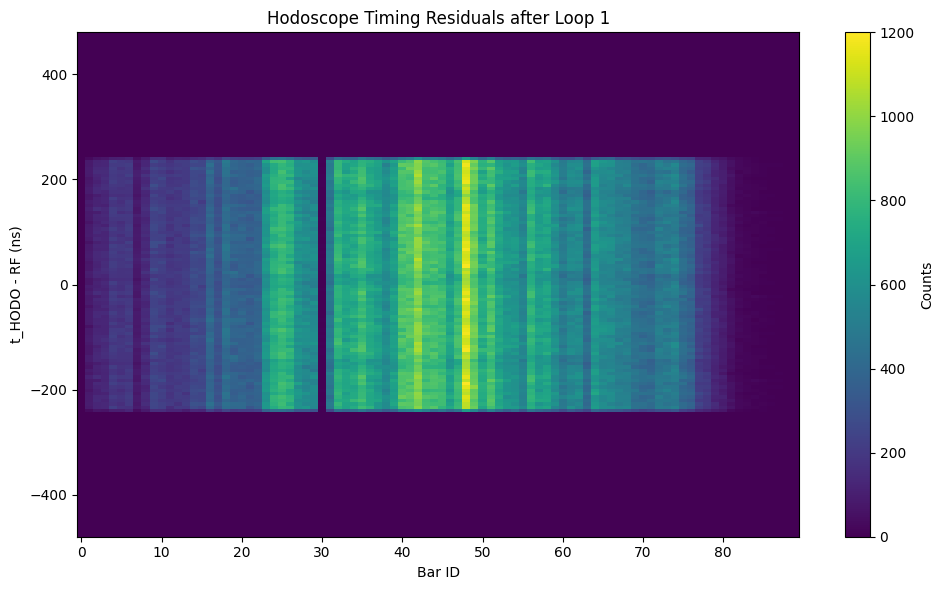

In [261]:
plot_dtRF_histogram(barids_rf, dt_rf)


In [295]:
d=plt.hist(dt_rf,bins=100)

ValueError: operands could not be broadcast together with shapes (1724164,) (3069867,) 

In [263]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.optimize import curve_fit
from matplotlib.backends.backend_pdf import PdfPages

def gaussian(x, A, mu, sigma):
    return A * np.exp(-(x - mu) ** 2 / (2 * sigma ** 2))

def extract_rf_offsets_with_plots(barids_rf, dt_rf, nbars=90, bins=150, dt_range=(-480, 480), entries_threshold=500, ref_bar=44, output_pdf="RFoffsets_debug.pdf"):
    """
    Extracts RF offsets per bar by fitting gaussians to dt_RF distributions.
    Saves plots of each bar's spectrum and fitted gaussian into a PDF.
    """
    # Create histograms for each bar
    bin_edges = np.linspace(*dt_range, bins + 1)
    bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
    hists = [np.histogram(dt_rf[barids_rf == b], bins=bin_edges)[0] for b in range(nbars)]

    RFoffsets = np.full(nbars, np.nan)
    dRFoffsets = np.full(nbars, np.nan)

    with PdfPages(output_pdf) as pdf:
        xtest = None

        for direction in ["right", "left"]:
            bar_range = range(ref_bar + 1, nbars) if direction == "right" else range(ref_bar - 1, -1, -1)

            if direction == "right":
                # Fit reference bar first
                y = hists[ref_bar]
                if np.sum(y) < entries_threshold:
                    continue

                peaks, _ = find_peaks(y, height=np.max(y)*0.3)
                if len(peaks) == 0:
                    continue

                ref_peak_idx = peaks[np.argmin(np.abs(bin_centers[peaks]))]
                xtest = bin_centers[ref_peak_idx]

                # Fit gaussian
                try:
                    popt, pcov = curve_fit(gaussian, bin_centers[ref_peak_idx-5:ref_peak_idx+6], y[ref_peak_idx-5:ref_peak_idx+6], p0=[y[ref_peak_idx], xtest, 2.0])
                    RFoffsets[ref_bar] = popt[1]
                    dRFoffsets[ref_bar] = np.sqrt(np.diag(pcov))[1]
                except Exception as e:
                    print(f"Ref bar {ref_bar} fit failed: {e}")
                    continue

                # Plot
                fig, ax = plt.subplots()
                ax.plot(bin_centers, y, label=f'Bar {ref_bar}')
                ax.plot(bin_centers, gaussian(bin_centers, *popt), label='Gaussian Fit')
                ax.set_title(f'RF Offset Fit - Bar {ref_bar}')
                ax.legend()
                pdf.savefig(fig)
                plt.close()

            for bar in bar_range:
                y = hists[bar]
                if np.sum(y) < entries_threshold:
                    continue

                peaks, _ = find_peaks(y, height=np.max(y)*0.3)
                if len(peaks) == 0 or xtest is None:
                    continue

                best_idx = peaks[np.argmin(np.abs(bin_centers[peaks] - xtest))]
                xpeak_best = bin_centers[best_idx]

                try:
                    window = (max(0, best_idx - 5), min(len(bin_centers), best_idx + 6))
                    popt, pcov = curve_fit(gaussian, bin_centers[window[0]:window[1]], y[window[0]:window[1]], p0=[y[best_idx], xpeak_best, 2.0])
                    RFoffsets[bar] = popt[1]
                    dRFoffsets[bar] = np.sqrt(np.diag(pcov))[1]
                    xtest = popt[1]
                except Exception as e:
                    print(f"Bar {bar} fit failed: {e}")
                    continue

                # Plot
                fig, ax = plt.subplots()
                ax.plot(bin_centers, y, label=f'Bar {bar}')
                ax.plot(bin_centers, gaussian(bin_centers, *popt), label='Gaussian Fit')
                ax.set_title(f'RF Offset Fit - Bar {bar}')
                ax.legend()
                pdf.savefig(fig)
                plt.close()

    return RFoffsets, dRFoffsets


In [264]:
RFoffsets, dRFoffsets = extract_rf_offsets_with_plots(
    barids_rf, dt_rf,
    ref_bar=44,
    output_pdf="RFoffsets_debug.pdf"
)


Ref bar 44 fit failed: Optimal parameters not found: Number of calls to function has reached maxfev = 800.
Bar 43 fit failed: Optimal parameters not found: Number of calls to function has reached maxfev = 800.
Bar 41 fit failed: Optimal parameters not found: Number of calls to function has reached maxfev = 800.
Bar 40 fit failed: Optimal parameters not found: Number of calls to function has reached maxfev = 800.
Bar 39 fit failed: Optimal parameters not found: Number of calls to function has reached maxfev = 800.
Bar 37 fit failed: Optimal parameters not found: Number of calls to function has reached maxfev = 800.
Bar 31 fit failed: Optimal parameters not found: Number of calls to function has reached maxfev = 800.
Bar 29 fit failed: Optimal parameters not found: Number of calls to function has reached maxfev = 800.
Bar 16 fit failed: Optimal parameters not found: Number of calls to function has reached maxfev = 800.
Bar 13 fit failed: Optimal parameters not found: Number of calls to f